<a href="https://colab.research.google.com/github/gopiBNK/files/blob/main/SLR1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analytic Solution:
Intercept (Beta 0): 1.2363636363636363
Slope (Beta 1): 1.1696969696969697
SSE: 5.624242424242423
R²: 0.952538038613988

Gradient Descent Solution:
Intercept (Beta 0): 1.175803611388339
Slope (Beta 1): 1.1793547634798334
SSE: 5.634921753015258
R²: 0.9524479176960737


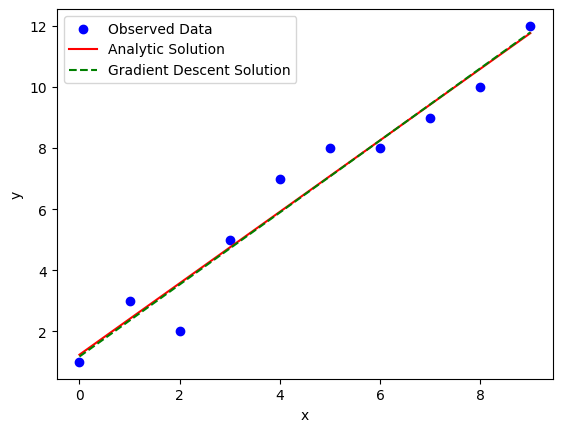

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

N = len(x)

x_avg = np.mean(x)
y_avg = np.mean(y)

numerator = np.sum((x - x_avg) * (y - y_avg))
denominator = np.sum((x - x_avg) ** 2)
slope = numerator / denominator
intercept = y_avg - slope * x_avg

y_pred_analytic = intercept + slope * x

sse_analytic = np.sum((y - y_pred_analytic) ** 2)
sst_total = np.sum((y - y_avg) ** 2)
r_squared_analytic = 1 - (sse_analytic / sst_total)

print("Analytic Solution:")
print(f"Intercept (Beta 0): {intercept}")
print(f"Slope (Beta 1): {slope}")
print(f"SSE: {sse_analytic}")
print(f"R²: {r_squared_analytic}")

beta_0_gd = 0
beta_1_gd = 0
learning_rate = 0.01
iterations = 1000

for _ in range(iterations):
    y_pred_gd = beta_0_gd + beta_1_gd * x
    error = y_pred_gd - y
    beta_0_gd -= learning_rate * (1/N) * np.sum(error)
    beta_1_gd -= learning_rate * (1/N) * np.sum(error * x)

sse_gd = np.sum((y - y_pred_gd) ** 2)
r_squared_gd = 1 - (sse_gd / sst_total)

print("\nGradient Descent Solution:")
print(f"Intercept (Beta 0): {beta_0_gd}")
print(f"Slope (Beta 1): {beta_1_gd}")
print(f"SSE: {sse_gd}")
print(f"R²: {r_squared_gd}")

plt.scatter(x, y, color='blue', label='Observed Data')
plt.plot(x, y_pred_analytic, color='red', label='Analytic Solution')
plt.plot(x, y_pred_gd, color='green', linestyle='--', label='Gradient Descent Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
